# 2. Labos uživo -Numerička matematika

Ime i prezime: Fran Ostroški, 0036535189

1 . Zadani su podaci 
$$ \begin{array}{c||c|c|c|c|c|c|}
x_i & 0.15&2.3 &3.15 & 4.85 & 6.25 & 7.95\\ \hline
y_i &4.79867& 4.49013 & 4.2243 & 3.47313 & 2.66674 & 1.51909\end{array}$$
koji predstavljaju vrijednost funkcije $f(x)=4.8 \cos \frac{\pi x}{20}$.  Odredite Lagrangeov interpolacijski polinom koristeći funkciju [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html), te grafički prikažite polinom i funkciju f(x), na istom grafu. (za pomoc mozete pogledati i prvu Jupyter bilježnicu vezanu za interpolaciju u predavanjima [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb) - ako ne radi ovaj link onda [link2](https://github.com/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb))

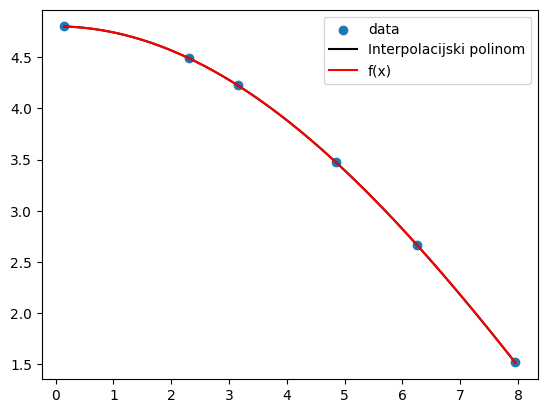

In [18]:
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import lagrange
xData = np.array([0.15,2.3,3.15,4.85,6.25,7.95])
yData = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])
# dalje sami....
# vektor za grafički prikaz xp = np.linspace(0.15, 7.95, 100) U ovom vektoru 
#izvrijednite funkciju i polinom i prikažite grafički.
xp = np.linspace(0.15, 7.95, 100)
poly = lagrange(xData, yData)
#print(poly.coef)

Polynomial(poly.coef[::-1]).coef

plt.scatter(xData, yData, label='data')
plt.plot(xp, Polynomial(poly.coef[::-1])(xp), label='Interpolacijski polinom', color='black')
plt.plot(xp,4.8 * np.cos((np.pi * xp)/20), label='f(x)',color='red')
plt.legend()
plt.show()

# jedan preko drugog su, vidi se ako se jedan zakomentira

  2 . Za podatke
$$ \begin{array}{c||c|c|c|c|c|c|}
x_i & 0.1&0.2 &0.3 & 0.4 & 0.5 & 0.6& 0.7 & 0.8 & 0.9 & 1.0\\ \hline
y_i &1& 5 & 2 & 7 & 1 & 2 & 2 & 7 & 9 & 2\end{array}$$
formiraj Vandermondeovu matricu te izračunaj koeficijente interpolacijskog polinoma, kao što je to napravljeno u početnoj Jupyter bilježnici s predavanja (1. bilježnica vezana za interpolaciju [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb)- ako ne radi ovaj link onda [link2](https://github.com/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb)). Nakon toga nacrtajte dobiveni polinom, ali to tako da ga izvrijednite u vektoru koji ima oko 100 točaka iz intervala $[0.1, 1.0]$ npr. f=np.polyval(c,xu) i plt.plot(xu,f, label=r'$p(x)$') gdje xu ima stotinjak točaka iz navedenog intervala.

Kondicija matrice V= 56019784.602602035


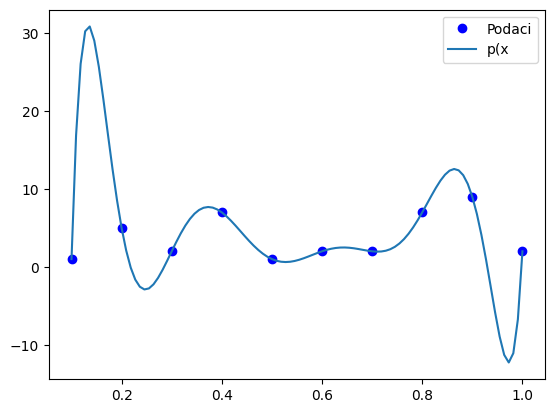

In [62]:
x = np.array([0.1,0.2,0.3,0.4,0.5,0.6, 0.7, 0.8, 0.9, 1.0])
y = np.array([1,5,2,7,1,2, 2,7, 9, 2])

xu = np.linspace(0.1, 1.0, 100)
V=np.vander(x,len(x), increasing=True)
print("Kondicija matrice V=", np.linalg.cond(V))

a=np.linalg.solve(V,y)

c=np.flipud(a)
f=np.polyval(c,xu)
# f=np.polyval(c,xu) 
plt.plot(x,y,'bo', label="Podaci")
plt.plot(xu,f, label='p(x') 
plt.legend()
plt.show()

3. a)Za podatke iz 2. zadatka upotrijebite funkciju polyfit [link](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), te aproksimirajte podatke, polinomom stupnja 1,2, 3, 9. Ovo je aproksimacija u smislu najmanjih kvadrata! Dobivamo li za $n=9$ intepolacijski polinom? (vidi predavanja. skripta: Metoda najmanjih kvadrata i Jupyter bilježnicu [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/mnk.ipynb)- ako ne radi ovaj link onda [link](https://github.com/anazga/Nummat-21_22/blob/main/mnk.ipynb))

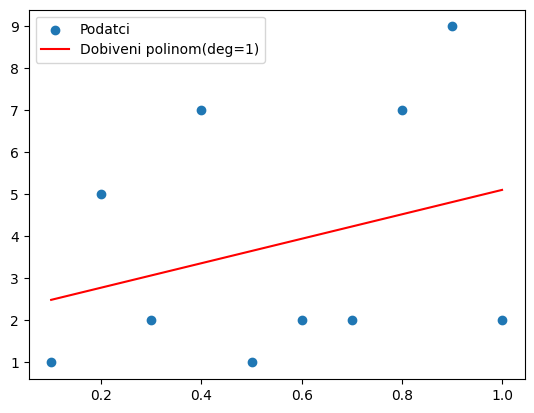

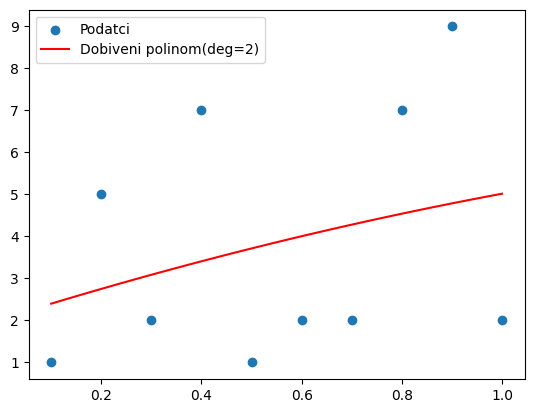

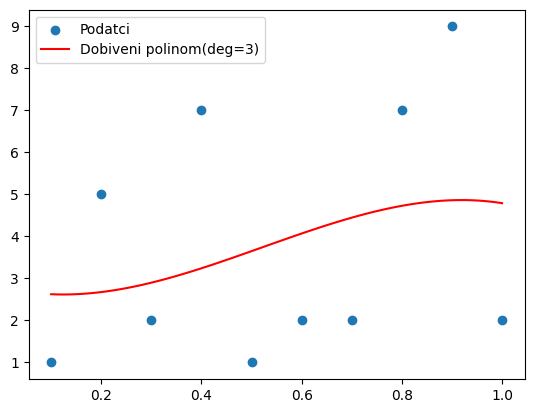

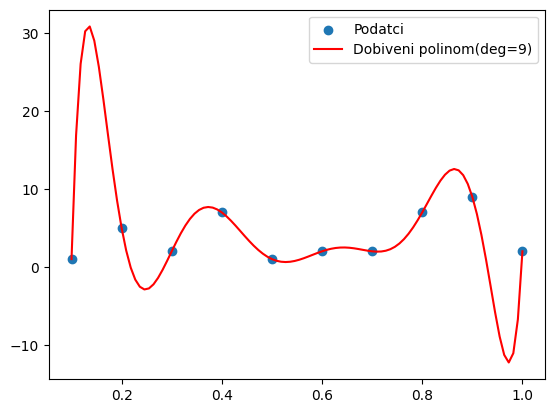

In [63]:
degrees = [1,2,3,9]

for deg in degrees:
    
    coefs  = np.polyfit(x,y,deg)
    y_fit = np.polyval(coefs, xu)

    plt.scatter(x, y, label='Podatci')
    plt.plot(xu, y_fit, label='Dobiveni polinom(deg={})'.format(deg), color='red')
    plt.legend()
    plt.show()
    #print(px)

b) Za iste podatke formiraj kubni splajn kao što je to napravljeno u Jupyter bilježnici s predavanja [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Splajnovi.ipynb) (za slučaj da ovaj link ne radi koristite [link2](https://github.com/anazga/Nummat-21_22/blob/main/Splajnovi.ipynb)) pomoću paketa *interpolate* te nacrtaj splajn za navedene podatke. U Markdown ćeliji napišite koja je interpolacija bolja (splajn ili polinom) i zašto.

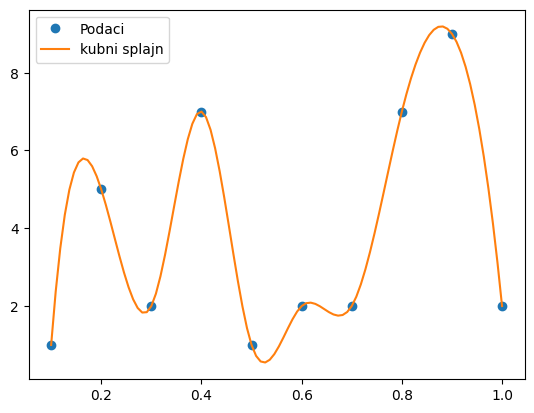

In [64]:
from scipy.interpolate import interp1d

y_cubic   = interp1d(x, y, kind='cubic')

plt.plot(x, y, 'o', label='Podaci')
plt.plot(xu, y_cubic(xu), label='kubni splajn')
plt.legend()
plt.show()

Bolja je interpolacija splajnom. Općenito su splajnovi bolje rješenje jer nemaju problema sa stršećim vrijednostima na rubovima kao polinomi.


4 .  Prema dostupnim informacijama na raspolaganju su nam sljedeći podaci o broju stanovnika u Hrvatskoj
$$\begin{array}{|c|c|} t_i& p_i \\ \hline \hline \\
1964. & 4259680\\
1969. & 4387000\\
1974. & 4497000\\
1979. & 4571000\\
1984. & 4680000\\
1989. & 4767000\\
1994. & 4650000\\
1999. & 4554000\\
2004. & 4439000\\
2009. & 4432001
\end{array}$$ 

Također poznata je informacija da je 2011. godine bilo $4456096$ stanovnika. Zadane podatke interpolirajte potom koristeći kubni splajn [link1](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline) kao što je to napravljeno u Jupyter bilježnici s predavanja [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb)- za slučaj da ovaj link ne radi koristiti [link3](https://github.com/anazga/Nummat-21_22/blob/main/Interpolacija_uvod.ipynb). Nacrtajte graf toga splajna. Nakon toga procijenite broj stanovnika u 2011. Izračunajte apsolutnu pogrešku. 

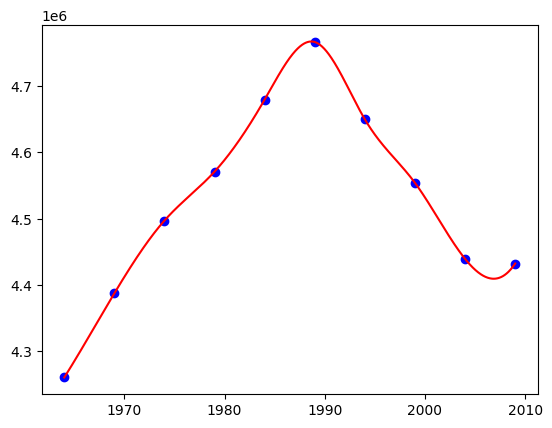

In [68]:
from scipy.interpolate import CubicSpline

xu = x=np.linspace(1964.0,2009.0,1000)
x=np.linspace(1964.0,2009.0,10)
y=np.array([4259680.0, 4387000.0, 4497000.0, 4571000.0, 4680000.0, 4767000.0, 4650000.0, 4554000.0, 4439000.0, 4432001.0])
# dalje sami
x

cs = CubicSpline(x, y)
plt.plot(x, y, 'bo', label="Podaci")
plt.plot(xu, cs(xu),'r-',label="kubni splajn")


5 .   Zadane podatke iz 4. zadatka  interpolirajte najprije koristeći polinomijalnu interpolaciju tako da iskoristite funkcije *lagrange* i *polyfit* koje ste koristili u 1. i 3. zadatku. Prikažite rezultate na zasebnim grafovima. Prolaze li interpolacijski polinomi u ovom slučaju interpolacijskim točkama?

/var/folders/bj/2hwfhd854k34vhjb3bbdlbdh0000gn/T/ipykernel_34723/1876682707.py:2: RankWarning: Polyfit may be poorly conditioned
  pf = np.polyfit(x,y,9)


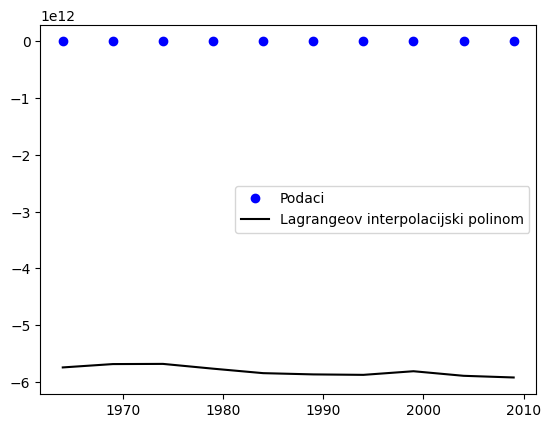

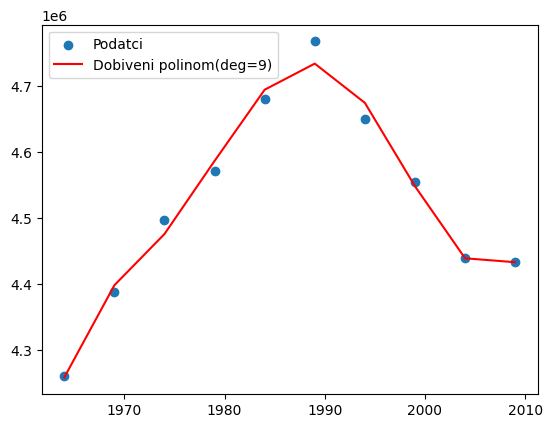

In [69]:
lg = lagrange(x,y)
pf = np.polyfit(x,y,9)

plt.plot(x, y, 'bo', label="Podaci")
plt.plot(x, Polynomial(lg.coef[::-1])(x), label='Lagrangeov interpolacijski polinom', color='black')
plt.legend()
plt.show()


y_pf_fit = np.polyval(pf, x)

plt.scatter(x, y, label='Podatci')
plt.plot(x, y_pf_fit, label='Dobiveni polinom(deg=9)', color='red')
plt.legend()
plt.show()

U ovom slučaju interpolacijski polinomi ne prolaze točkama.

6 .  Sada za podatke iz 4. zadatka iskoristite funkcije s predavanja te interpolirajte dane podatke u 4. zadatku Newtonovim interpolacijskim polinomom. implementacija s predavanja je dana u nastavku. (Za pomoc vidi Jupyter biljeznicu o Newtonovom interpolacijskom polinomu odnosno ovaj [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Newtonov_interpolacijski%20polinom.ipynb) - ako ovaj link ne funkcionira iskoristiti [link3](https://github.com/anazga/Nummat-21_22/blob/main/Newtonov_interpolacijski%20polinom.ipynb))

In [57]:
import numpy as np
import matplotlib.pyplot as plt

def evalPoly(c,x,xu):
    n = len(x) - 1 # Degree of polynomial
    p = c[n]
    for k in range(1,n+1):
        p = c[n-k] + (xu -x[n-k])*p
    return p

def polycoef(x,y):
    n = len(x) # Number of data points
    c = y.copy()
    for j in range(1,n):
        c[j:n] = (c[j:n] - c[j-1])/(x[j:n] - x[j-1])
    return c

def NewtonInterp(x,y,xu): # ovdje kao ulaz idu podaci x i y a u točka xu se polinom izvrednjava
    c = polycoef(x,y)
    yu = evalPoly(c,x,xu)
    #print(yu)
    return yu

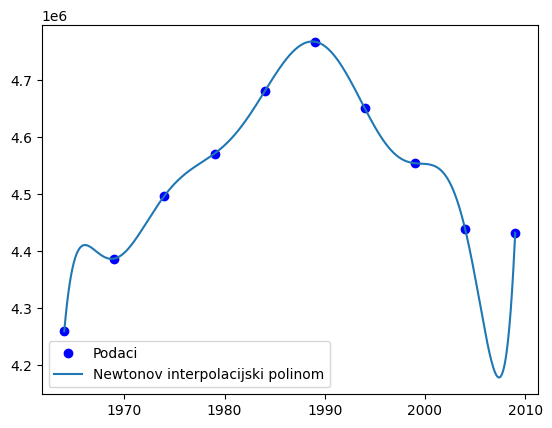

In [73]:
yu = NewtonInterp(x,y,xu)
plt.plot(x, y, 'bo', label="Podaci")
plt.plot(xu, yu,label="Newtonov interpolacijski polinom")
plt.legend()
plt.show()

7 .  Upotrijebite kompozitno trapezno pravilo s predavanja ili ono iz vec implementiranih funkcija u bibliotekama da izračunate vrijednost integrala $\int_0^{\sqrt{\pi}}x^3\cos(7x^2)\, dx$. Broj točaka uzmite po vlastitom izboru. ( za pomoc vidi Jupyter bilježnicu Numerička integracija [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Numericka_integracija.ipynb) -ako link ne funkcionira onda vidi [link2](https://github.com/anazga/Nummat-21_22/blob/main/Numericka_integracija.ipynb) )

In [76]:
def trapezna(f,a,b,N=50):
    x = np.linspace(a,b,N+1) 
    y = f(x)
    y_right = y[0:N] # lijevi rub intervala
    y_left = y[1:N+1] # desni rub intervala
    h = (b - a)/N
    Tn = np.sum(h*(y_right + y_left)/2)
    return Tn

print("Trapezna formula daje (N=100):" , trapezna(lambda x : x*x*x*np.cos(7*x*x),0,np.sqrt(np.pi), 100))
print("Trapezna formula daje (N=500):" , trapezna(lambda x : x*x*x*np.cos(7*x*x),0,np.sqrt(np.pi), 500))
print("Trapezna formula daje (N=1000):" , trapezna(lambda x : x*x*x*np.cos(7*x*x),0,np.sqrt(np.pi), 1000))

Trapezna formula daje (N=100): -0.02065811435580385
Trapezna formula daje (N=500): -0.020418037960266762
Trapezna formula daje (N=1000): -0.020410630984474862


8 . Iako na nastavi nismo ove godine radili Rombergov algoritam, probajte ga upotrijebiti da izračunate $\int_0^{\sqrt{\pi}}x^3\cos(7x^2)\, dx$ (za pomoc vidi Jupyter bilježnicu Numerička integracija [link](https://nbviewer.org/github/anazga/Nummat-21_22/blob/main/Numericka_integracija.ipynb) -ako link ne funkcionira onda vidi [link2](https://github.com/anazga/Nummat-21_22/blob/main/Numericka_integracija.ipynb))

In [86]:
def f(x) :
    return x*x*x*np.cos(7*x*x)

from scipy.integrate import romberg
result = romberg(f, 0, np.sqrt(np.pi), show=True)


Romberg integration of <function vectorize1.<locals>.vfunc at 0x177a54fe0> from [0, 1.7724538509055159]

 Steps  StepSize   Results
     1  1.772454 -4.934802 
     2  0.886227 -2.031222 -1.063362 
     4  0.443113  0.012844  0.694199  0.811370 
     8  0.221557 -0.611928 -0.820185 -0.921144 -0.948644 
    16  0.110778 -0.037457  0.154033  0.218981  0.237078  0.241728 
    32  0.055389 -0.023152 -0.018383 -0.029878 -0.033828 -0.034890 -0.035161 
    64  0.027695 -0.021030 -0.020323 -0.020452 -0.020302 -0.020249 -0.020235 -0.020231 
   128  0.013847 -0.020560 -0.020403 -0.020409 -0.020408 -0.020408 -0.020409 -0.020409 -0.020409 
   256  0.006924 -0.020446 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 
   512  0.003462 -0.020418 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 -0.020408 

The final result is -0.020408163265280065 after 513 function evaluations.


9 . Prouči funkciju [link](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html), upotrijebite ovu funkciju na matricu $A$ i $y$ po izboru da riješite problem nalaženja linearne regresije, odnosno da riješite preodređeni sustav $Ax\approx y$. (smijete preuzeti i neki primjer koji smo radili na vježbama ili iz ovog labosa, pripazite kakav je sustav (na predavanjima smo imali zapis $y=c_0+c_1x$, dok je na gornjem linku $y=c_0x+c_1$)). Nacrtajte dobiveni pravac.

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]


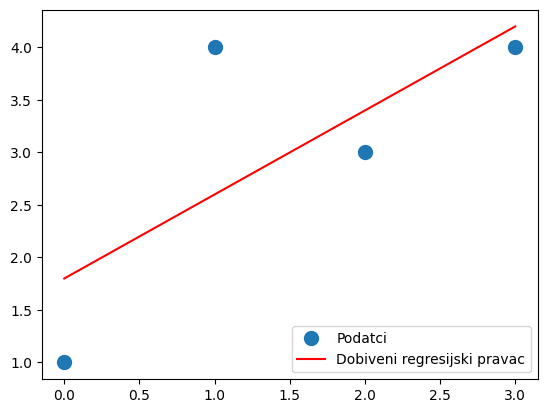

In [96]:
x = np.array([0, 1, 2, 3])
y = np.array([1, 4, 3, 4])

A = np.vstack([x, np.ones(len(x))]).T
print(A)
# m = c0 (uz x), c = c1 (slobodni)
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m, c

plt.plot(x, y, 'o', label='Podatci', markersize=10)
plt.plot(x, m*x + c, 'r', label='Dobiveni regresijski pravac')
plt.legend()
plt.show()


10. Odredite QR faktorizaciju matrice $A=\begin{bmatrix} 1& 0\\ 1& 1 \\ 1 & 3\end{bmatrix}$, te potom koristeći dobivenu faktorizaciju riješite problem najmanjih kvadrata $Ax\approx b$, gdje je  $b=\begin{bmatrix} 1\\ 2\\ 3\end{bmatrix}$ (u ovom slučaju tražite linearnu regresiju).


In [105]:
#from scipy.linalg import qr # isto se koristi kao i qr iz numpy
#u numpy biblioteki se dobije reducirana verizija, Q je pravokutna a R kvadratna
# u scipy se dobije Q kvadratna, a R pravokutna
M = np.array([[1, 0], [1, 1], [1, 3]])
print(M)
print(" ")

q, r= scipy.linalg.qr(M)
print("Q:",np.array(q))
print(" ")
print("R:",np.array(r))

[[1 0]
 [1 1]
 [1 3]]
 
Q: [[-0.57735027  0.6172134   0.53452248]
 [-0.57735027  0.15430335 -0.80178373]
 [-0.57735027 -0.77151675  0.26726124]]
 
R: [[-1.73205081 -2.30940108]
 [ 0.         -2.1602469 ]
 [ 0.          0.        ]]


10 .  Odredi SVD dekompoziciju matrice $A$ odabrane po vlastitom izboru. (za pomoc vidi [link](https://nbviewer.org/github/anazga/FER3-nummat/blob/main/17.predavanje.ipynb)), potom ispišite singularne vrijednosti koristeći funkciju [link 2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svdvals.html). Nakon toga ispišite svojstvene vrijednosti matrice $A^TA$ koristeći funkciju [link 3](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvalsh.html)

In [108]:
svalues = scipy.linalg.svdvals(M)
print("Singularne vrijednosti:",svalues)

Singularne vrijednosti: [3.43730605 1.08854357]
